# Pożary lasów w polsce w latach 2010-2019

Mateusz Orski 235939, Eksploracyjna analiza danych, EAIBD, 2022/2023, weeia inf. st.



# Dane

Dane pochodzą ze strony gus https://dane.gov.pl/pl. Opracowane są przez department rolnictwa. Dane skopiowane są z 3 plików pdf do excela. 2 pliki pdf to "roczniki" a jeden plik pdf to leśnictwo ogólny zawierający informację z lat 1946-2014. Wybrane w moim opracowaniu dane to lata 2010-2019.

Do swojej pracy wybrałem następujące dane:
- Lata
- Pozary liczba
- Powierzchnia pozarow (hektary)
- Podpalenia liczba
- Podpalenia powierzchnia
- Straty przez pozary (mln pln)
- wyladowania atmosferyczne


# Wnioski

Praca będzie podzielona na kilka cześci. Każda z części będzie miała osobne wnioski.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';')
print(df)

                             Lata  2010  2011  2012  2013  2014   2015  2016  \
0                   Pozary liczba  4680  8172  9265  4883  5245  12257  5286   
1  Powierzchnia pozarow (hektary)  2126  2678  7235  1289  2690   5510  1451   
2               Podpalenia liczba  2032  3470  3853  2015  2066   5134  2240   
3         Podpalenia powierzchnia   686  1140  2967   548   842   2086   516   
4   Straty przez pozary (mln pln)   3,0   2,1   6,0   1,7   4,0    6,6   1,8   
5       wyladowania atmosferyczne    34    73    46    22    53    123    43   

   2017  2018  2019  
0  3592  8867  9635  
1  1023  2696  3572  
2  1590  3563  4047  
3   477   972  1523  
4   1,3   4,8   8,6  
5    32    70   116  


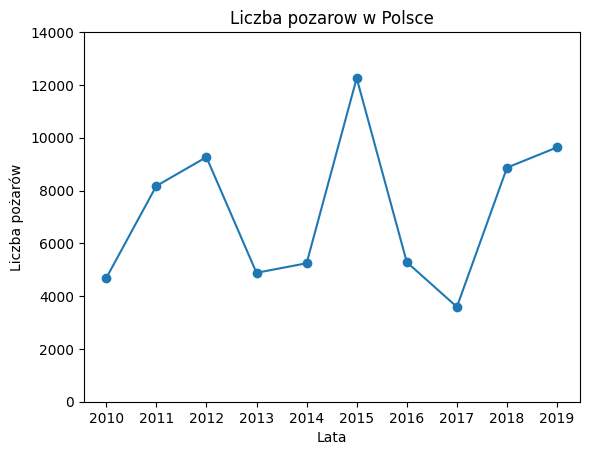

In [18]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';', index_col=0)
pozary = df.loc['Pozary liczba']

plt.plot(pozary.index, pozary.values, marker='o')

plt.xlabel('Lata')
plt.title('Liczba pozarow w Polsce')

plt.ylabel('Liczba pożarów')
plt.ylim([0, 14000])

plt.show()

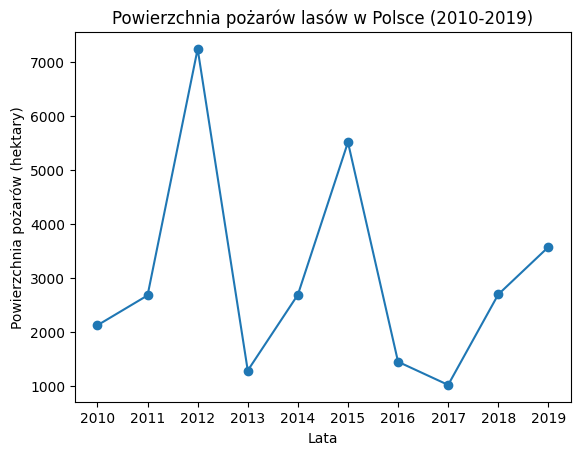

In [20]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', sep=';', index_col=0)

powierzchnia_pozarow = df.loc['Powierzchnia pozarow (hektary)']

fig, ax = plt.subplots()
ax.plot(powierzchnia_pozarow.index, powierzchnia_pozarow, marker='o')

ax.set_title('Powierzchnia pożarów lasów w Polsce (2010-2019)')
ax.set_xlabel('Lata')
ax.set_ylabel('Powierzchnia pożarów (hektary)')

plt.show()

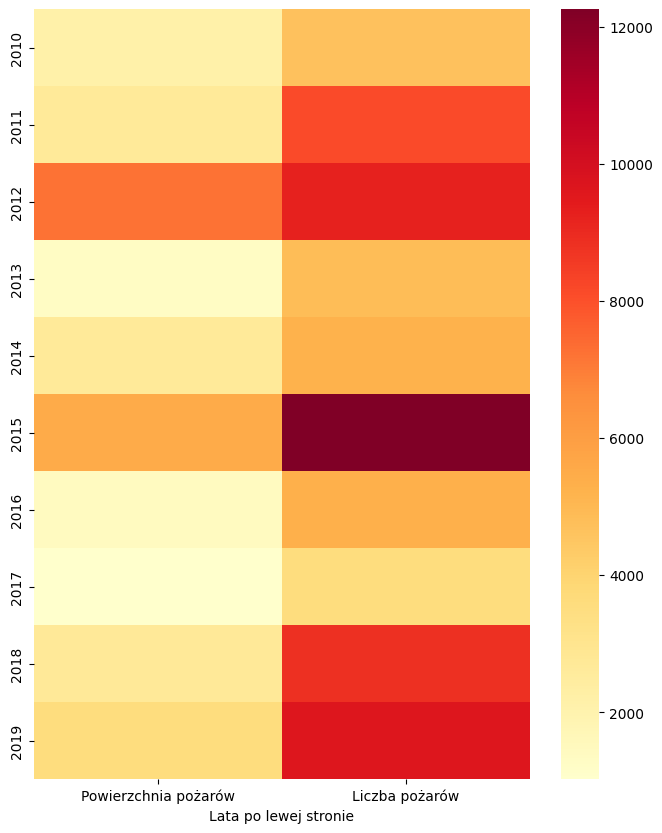

In [24]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';')

area_data = df.iloc[1, 1:].astype(float)
num_fires_data = df.iloc[0, 1:].astype(float)

data = pd.DataFrame({'Powierzchnia pożarów': area_data, 'Liczba pożarów': num_fires_data})

plt.figure(figsize=(8,10))

sns.heatmap(data, cmap='YlOrRd')

plt.xlabel('Lata po lewej stronie')
plt.ylabel('')
plt.show()

# Wnioski z powyższych wykresów

Po zobaczeniu powyższych wykresów możemy jasno stwierdzić że liczba pożarów w polsce oraz powierzchnia pożarów w Polsce nie ma trendu. Nie możemy udowdnić że pożary maleją lub spadają wraz z upływem lat. Patrząc na "heatmapę" można zauważyc korelację pomiędzy liczbą pożarów a powierzchnią pożarów tylko w niektórych latach. Szczególnie widać to w 2015 i 2012, jednak w każdym roku widać że te dane są ze sobą ścisle powiązane i przynajmniej w wybranym okresie czasu dane są ze sobą powiązane.

# Podpalenia

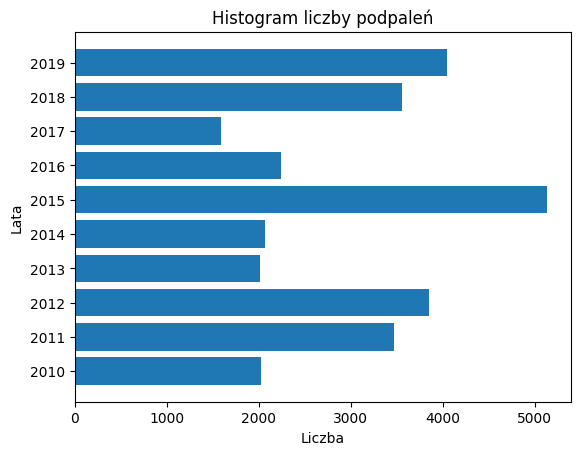

In [33]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';')

podpalenia_liczba = df.loc[2, '2010':'2019']
podpalenia_liczba = pd.to_numeric(podpalenia_liczba)

plt.barh(y=podpalenia_liczba.index, width=podpalenia_liczba.values)
plt.title('Histogram liczby podpaleń')
plt.xlabel('Liczba')
plt.ylabel('Lata')
plt.show()

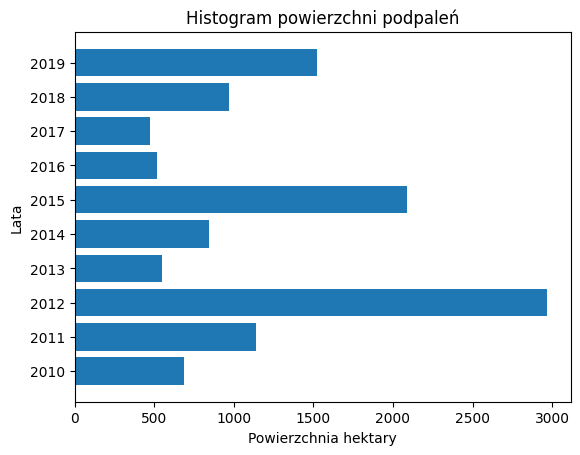

In [35]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';')

podpalenia_powierzchnia = df.loc[3, '2010':'2019']
podpalenia_powierzchnia = pd.to_numeric(podpalenia_powierzchnia)

plt.barh(y=podpalenia_powierzchnia.index, width=podpalenia_powierzchnia.values)
plt.title('Histogram powierzchni podpaleń')
plt.xlabel('Powierzchnia hektary')
plt.ylabel('Lata')
plt.show()

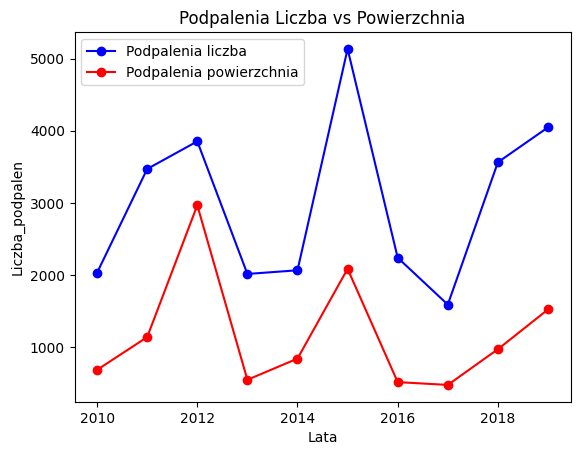

In [27]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';')

podpalenia_liczba = df.loc[2, '2010':'2019']
podpalenia_powierzchnia = df.loc[3, '2010':'2019']

years = podpalenia_liczba.index.astype(int)

plt.plot(years, podpalenia_liczba, 'bo-', label='Podpalenia liczba')
plt.plot(years, podpalenia_powierzchnia, 'ro-', label='Podpalenia powierzchnia')
plt.title('Podpalenia Liczba vs Powierzchnia')
plt.xlabel('Lata')
plt.ylabel('Liczba_podpalen')
plt.legend()
plt.show()

# Wnioski

Porównaliśmy tutaj liczbę podpaleń do powierzchni przez nie spalone. Ostatni wykres ma za zadanie pokazać nam zależność pomiędzy
tymi danymi.Widzimy że im większa liczba podpaleń tym większa spalona powierzchnia.

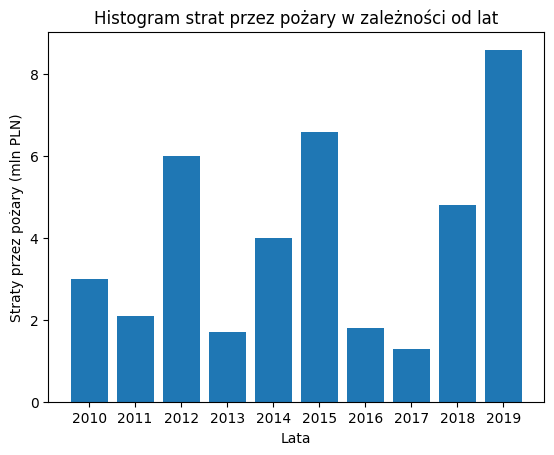

In [29]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';', index_col=0)

straty = df.loc['Straty przez pozary (mln pln)']
straty = straty.str.replace(',', '.').astype(float)

plt.bar(x=straty.index, height=straty.values)
plt.title('Histogram strat przez pożary w zależności od lat')
plt.xlabel('Lata')
plt.ylabel('Straty przez pożary (mln PLN)')
plt.show()

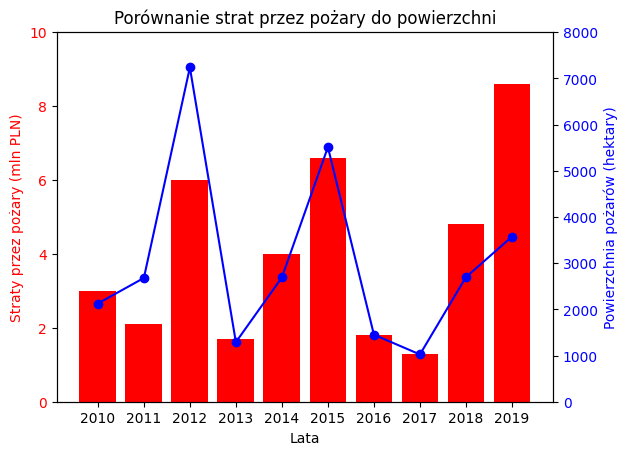

In [40]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';', index_col=0)

straty = df.loc['Straty przez pozary (mln pln)']
straty = straty.str.replace(',', '.').astype(float)
powierzchnia = df.loc['Powierzchnia pozarow (hektary)']
powierzchnia = pd.to_numeric(powierzchnia)

fig, ax1 = plt.subplots()
ax1.bar(x=straty.index, height=straty.values, color='r')
ax1.set_xlabel('Lata')
ax1.set_ylabel('Straty przez pożary (mln PLN)', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_ylim([0, 10])

ax2 = ax1.twinx()
ax2.plot(powierzchnia.index, powierzchnia.values, marker='o', color='b')
ax2.set_ylabel('Powierzchnia pożarów (hektary)', color='b')
ax2.tick_params(axis='y', labelcolor='b')
ax2.set_ylim([0, 8000])

plt.title('Porównanie strat przez pożary do powierzchni')

plt.show()

# Wnioski


Widzimy że straty mają związek z powierzchnią lasów które spłonęły jednak nie jest to jedyny czynnik strat. Gdy porównamy lata
2012 do 2019 to mimo że powierzchnia we wcześniejszym roku jest większa to straty są mniejsze.

# Czy przyroda nam kradnie pieniądze?


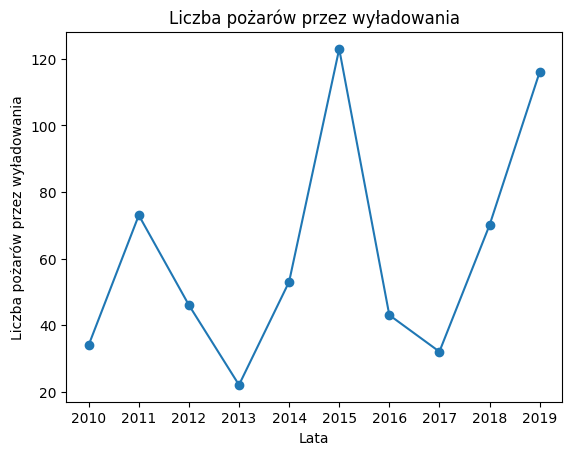

In [38]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';')

lata = df.loc[df['Lata'] == 'wyladowania atmosferyczne'].columns[1:]
wyladowania = df.loc[df['Lata'] == 'wyladowania atmosferyczne'].values.tolist()[0][1:]

wyladowania = [int(x) for x in wyladowania]

plt.plot(lata, wyladowania, 'o-')
plt.xlabel('Lata')
plt.ylabel('Liczba pożarów przez wyładowania')
plt.title('Liczba pożarów przez wyładowania')
plt.show()

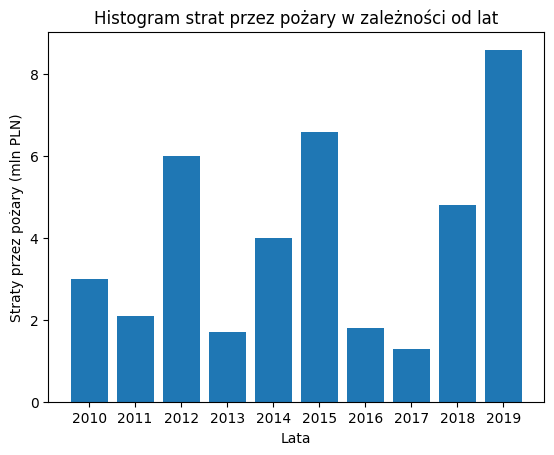

In [39]:
df = pd.read_csv('D:/5semestr/eda/dane_gus__eda/excele_do_eda/Pozary_dane.csv', delimiter=';', index_col=0)

straty = df.loc['Straty przez pozary (mln pln)']
straty = straty.str.replace(',', '.').astype(float)

plt.bar(x=straty.index, height=straty.values)
plt.title('Histogram strat przez pożary w zależności od lat')
plt.xlabel('Lata')
plt.ylabel('Straty przez pożary (mln PLN)')
plt.show()

Porównując te 2 wykresy widzimy że nie przyroda nas nie do końca okrada. O ile w większości lat im więcej wyładowań tym wyższe straty to rok 2012 temu zaprzecz. Potrzebne są w tym przypadku dalsze analizy.